In [1]:
from pathlib import Path
import os
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
#Configurations
dataset_location =  "/mnt/e/drives/dtx/OneDrive - Universidade do Minho/projects/github/repos/HIcode/data_sample"
dataset_name = "data.csv"
output_results = "/mnt/e/drives/dtx/OneDrive - Universidade do Minho/projects/github/repos/HIcode/prototype/results"
separator = ","

In [3]:
# Load dataset
dataset_path = Path(dataset_location) / Path(dataset_name)
df =  pd.read_csv(dataset_path, sep=separator)
display(df)
cols_cat = ['cat1']
cols_num = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7']
cols_target = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7']

,cat1,timestamp,num1,num2,num3,num4,num5,num6,num7
0,1,2022-07-01,-0.028108,-1.252247e-01,-1.782633e-02,-0.142115,4.863945e-17,0.000000,-1.589478e-02
1,2,2022-07-01,0.018927,-1.234638e-01,-1.781289e-02,-0.124046,-2.448495e-01,-0.484340,-1.589478e-02
2,3,2022-10-01,0.018412,1.878843e-17,-1.782275e-02,-0.139451,-2.150410e-01,0.631104,-1.589478e-02
3,4,2022-11-01,0.018927,-1.133930e-01,-1.782103e-02,-0.081089,-1.646300e-01,0.000000,-1.589478e-02
4,5,2022-01-01,0.021718,1.878843e-17,-3.152080e-18,-0.145145,-2.931325e-01,0.021933,-1.589478e-02
5,6,2022-12-01,0.018645,8.679941e-02,-1.757655e-02,-0.145145,-2.247374e-01,0.055201,-1.589478e-02
6,7,2022-01-01,0.018717,1.878843e-17,-3.152080e-18,-0.145145,-2.979869e-01,-0.444159,-2.226153e-18
7,8,2022-03-01,0.018701,1.878843e-17,NaN,-0.145145,-2.758174e-01,-0.444159,-2.226153e-18
8,9,2023-01-01,0.018715,1.878843e-17,-1.764709e-02,-0.145145,-3.026075e-01,-0.444159,-2.226153e-18
9,10,2023-02-01,0.018506,-1.157170e-01,-1.782531e-02,-0.145145,-2.872321e-01,0.000000,-1.589478e-02


In [4]:
# Transform dataset

## Convert data types
for col in cols_num:
    df[col].replace(regex=True, inplace=True, to_replace=r"[^0-9.\-]", value=r"")
### Convert columns to numeric that were read as object.
df[cols_num] = df[cols_num].apply(pd.to_numeric, errors="coerce")
df[cols_cat] = df[cols_cat].astype("category")


## Drop duplicates
df.drop_duplicates(keep="first")

## Impute missing values
imputer = SimpleImputer(strategy="mean")
imputer.fit(df[cols_num])
df[cols_num] = imputer.transform(df[cols_num])

display(df)

,cat1,timestamp,num1,num2,num3,num4,num5,num6,num7
0,1,2022-07-01,-0.028108,-1.252247e-01,-1.782633e-02,-0.142115,4.863945e-17,0.000000,-1.589478e-02
1,2,2022-07-01,0.018927,-1.234638e-01,-1.781289e-02,-0.124046,-2.448495e-01,-0.484340,-1.589478e-02
2,3,2022-10-01,0.018412,1.878843e-17,-1.782275e-02,-0.139451,-2.150410e-01,0.631104,-1.589478e-02
3,4,2022-11-01,0.018927,-1.133930e-01,-1.782103e-02,-0.081089,-1.646300e-01,0.000000,-1.589478e-02
4,5,2022-01-01,0.021718,1.878843e-17,-3.152080e-18,-0.145145,-2.931325e-01,0.021933,-1.589478e-02
5,6,2022-12-01,0.018645,8.679941e-02,-1.757655e-02,-0.145145,-2.247374e-01,0.055201,-1.589478e-02
6,7,2022-01-01,0.018717,1.878843e-17,-3.152080e-18,-0.145145,-2.979869e-01,-0.444159,-2.226153e-18
7,8,2022-03-01,0.018701,1.878843e-17,-1.404916e-02,-0.145145,-2.758174e-01,-0.444159,-2.226153e-18
8,9,2023-01-01,0.018715,1.878843e-17,-1.764709e-02,-0.145145,-3.026075e-01,-0.444159,-2.226153e-18
9,10,2023-02-01,0.018506,-1.157170e-01,-1.782531e-02,-0.145145,-2.872321e-01,0.000000,-1.589478e-02


<Axes: >

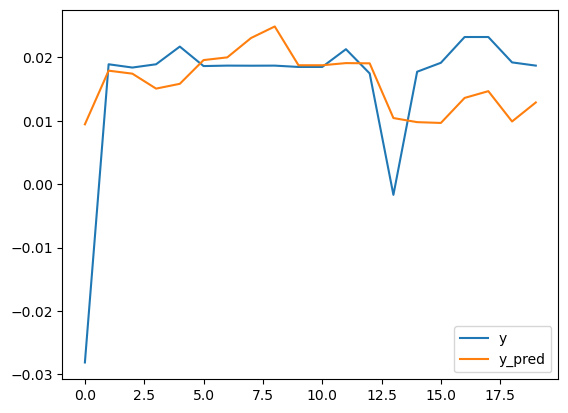

In [6]:
# Modeling
from sklearn.linear_model import LinearRegression

X = df[cols_target[1:]].to_numpy()
y = df[cols_target[0]].to_numpy()
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
results = pd.DataFrame({"y": y, "y_pred": y_pred})
results.plot()
